In [23]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing, utils
from scipy.stats import t
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [3]:
# 1

data_set = sm.datasets.get_rdataset('airquality')
df = data_set.data
# data_set.dropna(inplace=True)
df_clean = df.dropna()

# print sample

# Train the model using the training sets

Y_trainv1 = df_clean.ix[:,0]
X_trainv1= df_clean.ix[:,1:6]
# X_trainv1 = sm.add_constant(X_trainv1)

# results = sm.OLS(Y_trainv1, X_trainv1).fit().params
# print results

regr = linear_model.LinearRegression()    
regr.fit(X_trainv1, Y_trainv1)
print '############'
print 'Raw Output'
print '############'
print regr.coef_
print regr.intercept_

# N = 10000

def bootstrap(N):
    NumberOfX = 5
    interList= []
    thetaList = [[] for _ in range(NumberOfX)]

    for i in range(N):
        sample = utils.resample(df_clean)
        Y_train = sample.ix[:,0]
        X_train = sample.ix[:,1:6]
        X_train_scaled = preprocessing.scale(X_train)
        regr.fit(X_train_scaled, Y_train)
#         regr.fit(X_train, Y_train)
        interList.append(regr.intercept_)
        for i in range(len(regr.coef_)):
            thetaList[i].append(regr.coef_[i])

    thetaList= np.sort(thetaList, axis=1)
    

    return thetaList, interList

def meanAndMedian(thetaList, interList):
    NumberOfX = 5
    thetaMeanList = [0 for _ in range(NumberOfX)]
    interceptMeanList = []
    thetaMedianList = [0 for _ in range(NumberOfX)]
    interceptMedianList = []

    thetaMeanList= np.mean(thetaList, axis=1)
    interceptMeanList = np.mean(interList)

    thetaMedianList = np.median(thetaList, axis=1)
    interceptMedianList = np.median(interList)
    
    return thetaMeanList, interceptMeanList, thetaMedianList, interceptMedianList

print '############'
print 'Bootstrap'
print '############'
N = 500
thetaList,interList = bootstrap(N)
thetaMean, interMean, thetaMedian, interMedian = meanAndMedian(thetaList,interList)

print "mean theta: " + str(thetaMean) +" mean intercept: " + str(interMean)
print "median theta: " + str(thetaMedian) +" median intercept: " + str(interMedian)

############
Raw Output
############
[ 0.05027432 -3.31844386  1.89578642 -3.03995664  0.27387752]
-64.1163211033
############
Bootstrap
############
mean theta: [  4.59257569 -11.90219996  17.77979868  -4.40496989   2.25818689] mean intercept: 42.3609189189
median theta: [  4.5652013  -11.77858598  17.79024166  -4.42110987   2.33096569] median intercept: 42.3558558559


In [4]:
# 2 

alpha = 0.01

# 
def quantileTheta(lis):
    mini = np.percentile(thetaList, 0.5, axis=1)
    maxi= np.percentile(thetaList, 99.5, axis=1)
    return mini, maxi

def quantileInter(lis):
    mini = np.percentile(thetaList, 0.5)
    maxi= np.percentile(thetaList, 99.5)
    return mini, maxi

miniT, maxiT = quantileTheta(thetaList)
miniI, maxiI = quantileTheta(thetaList)

for i in range(len(miniT)):
    print '[' + str(miniT[i]) + '; ' + str(maxiT[i]) + ']'

print '[' + str(miniI[i]) + '; ' + str(maxiI[i]) + ']'


[-0.414872967504; 9.33026096257]
[-21.0315521179; -4.48114025151]
[11.9265653166; 23.1299709192]
[-9.41034410956; 0.732879738957]
[-3.17775737965; 7.25879371108]
[-3.17775737965; 7.25879371108]


In [5]:
# 3

courbeMini = []
courbeMaxi = []
courbeMedian = []
for i in range(1, 5001, 500):
    thetaList,interList = bootstrap(i)
    thetaMean, interMean, thetaMedian, interMedian = meanAndMedian(thetaList,interList)
    miniT, maxiT = quantileTheta(thetaList)
    courbeMini.append(miniT[1])
    courbeMaxi.append(maxiT[1])
    courbeMedian.append(thetaMedian[1])

print courbeMini
print courbeMaxi
print courbeMedian


[-10.90608421820043, -20.941077436678277, -19.805599454781518, -19.770145125349778, -20.109965799604296, -20.108342064174785, -19.957698415601769, -19.877457179872358, -19.794268847316271, -19.791725035857674]
[-10.90608421820043, -5.2171964370847839, -4.8825430938691223, -4.9523812057125323, -4.9334561477799443, -5.2976582282715743, -4.930824159248445, -4.9740546574109707, -4.4926864712007113, -5.1105493974391027]
[-10.90608421820043, -11.587859600051633, -11.688082855933686, -11.715420610576405, -11.698935576186408, -11.669127652759549, -11.622011525120589, -11.552450577107109, -11.667164531452901, -11.617091920890717]


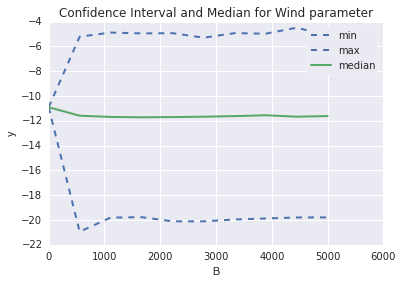

In [58]:
%matplotlib inline
# affiche le graph à l'interieur de ipython
xplot = np.linspace(1, 5001, 10)


fig = plt.figure()

# plt.plot(xplot, courbeMedian, '--',linewidth=2.0)
plt.plot(xplot, courbeMini, 'b--', label="min", linewidth=2.0)
plt.plot(xplot, courbeMaxi, 'b--', label="max", linewidth=2.0)
plt.plot(xplot, courbeMedian, 'g', label="median", linewidth=2.0)

plt.title('Confidence Interval and Median for Wind parameter')
plt.xlabel('B')
plt.ylabel('y')

plt.legend(frameon=True)
# plt.show()

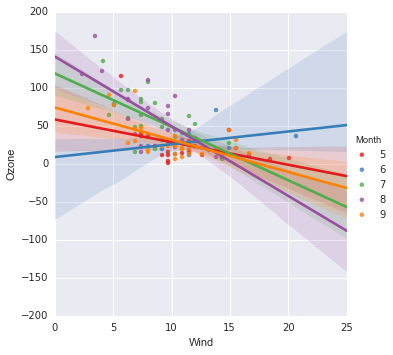

In [59]:
# 4

sns.set(color_codes=True)
sns.lmplot(x="Wind", y="Ozone", hue="Month", data=df_clean, palette="Set1");

In [30]:


data_set = sm.datasets.get_rdataset('airquality')
df = data_set.data
# data_set.dropna(inplace=True)
df_clean = df.dropna()

regr1 = linear_model.LinearRegression() 

monthDic = {}
for i in range (1,13,1):
    dfMonth = df_clean.loc[df_clean['Month'] == i]
    if len(dfMonth) != 0:
        y_train = dfMonth[['Ozone']]
        x_train = dfMonth[['Wind']]
        regr1.fit(x_train, y_train)
        coef_temp = regr1.coef_[0][0]
        inter_temp = regr1.intercept_[0]
        monthDic[i] = [inter_temp , coef_temp, x_train, y_train]

# print monthDic


In [ ]:
fig = plt.figure()

x = np.linspace(5,10,5)
for key, value in monthDic.iteritems():
    y = value[0] + x * value[1]
    plt.plot(x, y, label=str(key))

plt.legend(frameon=True)